In [2]:
# Arvind Prasadan
# 2019 January
# DMF Package 
# Real Data Simulations

# DMF Package
push!(LOAD_PATH, "../src/")
using DMF

# Basic Linear Algebra Functionality
using LinearAlgebra
using Statistics
using StatsBase

# Plotting and Output
using Plots
using Measures
using LaTeXStrings
using Interact

# File IO
using JLD
using WAV

# Set plotting interface
pyplot()

Plots.PyPlotBackend()

# Audio Mixing

In [4]:
# Load Audio
s1, fs = wavread("data/source1.wav")
s2, fs = wavread("data/source5.wav")

s1 = normalize(s1[:])
s2 = normalize(s2[:])
C = [s1'; s2']'

@show s1' * s2

s1' * s2 = -0.003186242797727691


-0.003186242797727691

In [10]:
# For plotting: scaling functions 
scale_min(x) = x .- minimum(x[:])
scale_max(x) = x ./ maximum(x[:])
scale_11(x) = (2.0 * scale_max(scale_min(x))) .- 1.0

scale_11 (generic function with 1 method)

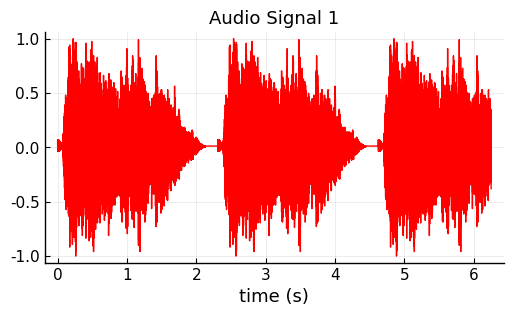

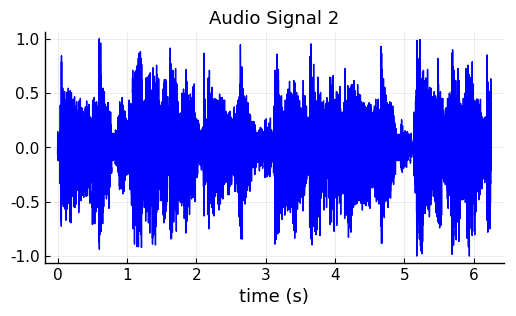

In [11]:
p1 = plot(reuse = false, size = (500, 300))
p1 = plot!((1:1:length(s1)) ./ Int(fs), scale_11(s1), xlabel = "time (s)", title = "Audio Signal 1", legend = false, tickfont = Plots.font("Helvetica", 11), guidefont = Plots.font("Helvetica", 13), titlefont = Plots.font("Helvetica", 13), color = :red)

p2 = plot(reuse = false, size = (500, 300))
p2 = plot!((1:1:length(s2)) ./ Int(fs), scale_11(s2), xlabel = "time (s)", title = "Audio Signal 2", legend = false, tickfont = Plots.font("Helvetica", 11), guidefont = Plots.font("Helvetica", 13), titlefont = Plots.font("Helvetica", 13), color = :blue)

display(plot(p1))
display(plot(p2))

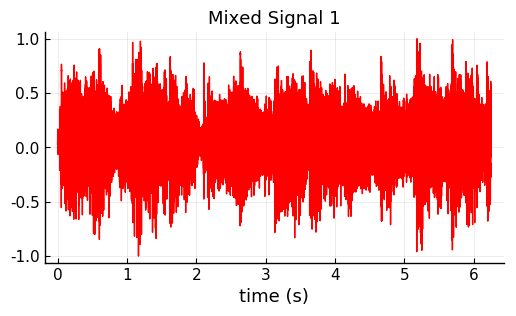

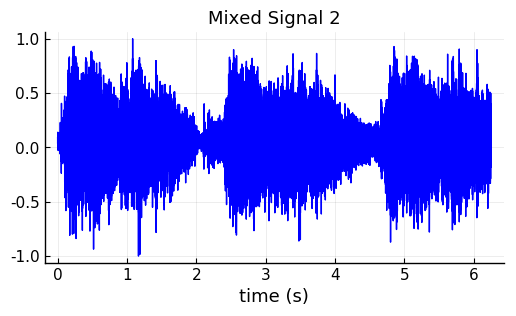

In [13]:
Q = [1 2; 2 1]
Q = mapslices(normalize, Q; dims = 1)

X = Q * C'

p1 = plot(reuse = false, size = (500, 300))
p1 = plot!((1:1:length(s1)) / Int(fs), scale_11(X[1, :]), xlabel = "time (s)", title = "Mixed Signal 1", legend = false, tickfont = Plots.font("Helvetica", 11), guidefont = Plots.font("Helvetica", 13), titlefont = Plots.font("Helvetica", 13), color = :red)

p2 = plot(reuse = false, size = (500, 300))
p2 = plot!((1:1:length(s2)) / Int(fs), scale_11(X[2, :]), xlabel = "time (s)", title = "Mixed Signal 2", legend = false, tickfont = Plots.font("Helvetica", 11), guidefont = Plots.font("Helvetica", 13), titlefont = Plots.font("Helvetica", 13), color = :blue)

display(plot(p1))
display(plot(p2))


In [15]:
# Perform DMD

_, Q_hat, C_hat, _ = dmf(X; C_nsv = 2)
@show eigenvector_error(Q, Q_hat[:, 1:2])
@show eigenvector_error(C, C_hat)

eigenvector_error(Q, Q_hat[:, 1:2]) = 2.157657103607491e-5
eigenvector_error(C, C_hat) = 5.955210629737806e-5


5.955210629737806e-5

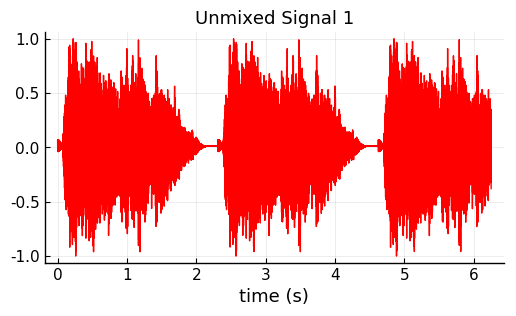

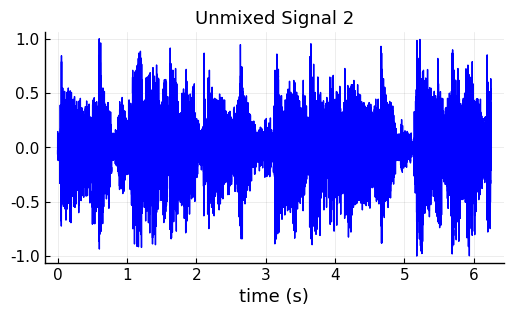

In [20]:
sort_idx = sortperm(abs.(C_hat[:, 1:2]' * C)[:, 1], rev = true)

p1 = plot(reuse = false, size = (500, 300))
p1 = plot!((1:1:length(s1)) / Int(fs), scale_11(C_hat[:, sort_idx[1]]), xlabel = "time (s)", title = "Unmixed Signal 1", legend = false, tickfont = Plots.font("Helvetica", 11), guidefont = Plots.font("Helvetica", 13), titlefont = Plots.font("Helvetica", 13), color = :red)

p2 = plot(reuse = false, size = (500, 300))
p2 = plot!((1:1:length(s2)) / Int(fs), scale_11(C_hat[:, sort_idx[2]]), xlabel = "time (s)", title = "Unmixed Signal 2", legend = false, tickfont = Plots.font("Helvetica", 11), guidefont = Plots.font("Helvetica", 13), titlefont = Plots.font("Helvetica", 13), color = :blue)

display(plot(p1))
display(plot(p2))

In [23]:
# SVD

U, s, V = svd(X, full = false)

@show eigenvector_error(Q, U[:, 1:2])
@show eigenvector_error(C, V[:, 1:2])

eigenvector_error(Q, U[:, 1:2]) = 0.3999999999999986
eigenvector_error(C, V[:, 1:2]) = 1.9936275144045443


1.9936275144045443

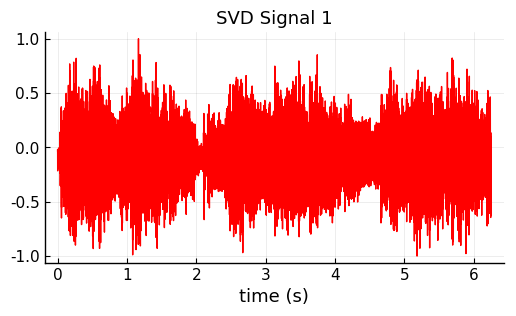

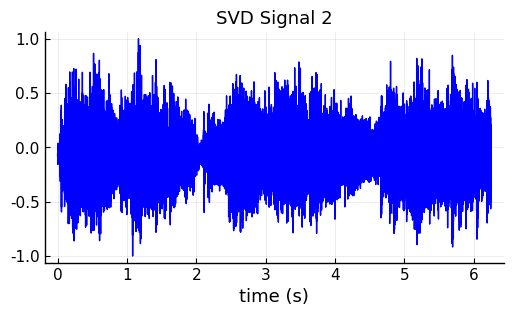

In [25]:
sort_idx = sortperm(abs.(V[:, 1:2]' * C)[:, 1], rev = true)

p1 = plot(reuse = false, size = (500, 300))
p1 = plot!((1:1:length(s1)) / Int(fs), scale_11(V[:, sort_idx[1]]), xlabel = "time (s)", title = "SVD Signal 1", legend = false, tickfont = Plots.font("Helvetica", 11), guidefont = Plots.font("Helvetica", 13), titlefont = Plots.font("Helvetica", 13), color = :red)

p2 = plot(reuse = false, size = (500, 300))
p2 = plot!((1:1:length(s2)) / Int(fs), scale_11(V[:, sort_idx[2]]), xlabel = "time (s)", title = "SVD Signal 2", legend = false, tickfont = Plots.font("Helvetica", 11), guidefont = Plots.font("Helvetica", 13), titlefont = Plots.font("Helvetica", 13), color = :blue)

display(plot(p1))
display(plot(p2))

In [27]:
# ICA
tmp = load("data/audio_ICA.jld")
C_hat_ICA = tmp["Xica"]'

@show eigenvector_error(C, C_hat_ICA)

eigenvector_error(C, C_hat_ICA) = 0.0030708543290542956


0.0030708543290542956

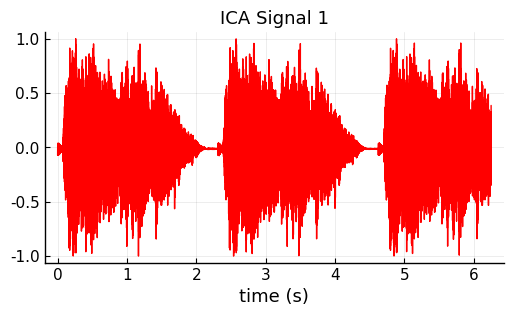

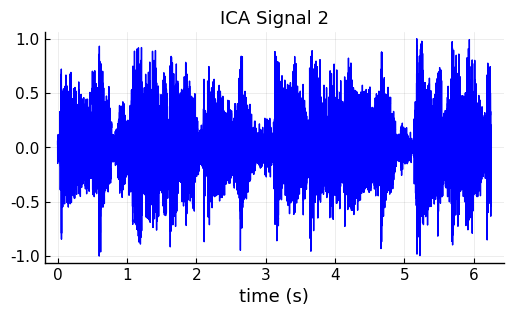

In [29]:
sort_idx = sortperm(abs.(C_hat_ICA[:, 1:2]' * C)[:, 1], rev = true)

p1 = plot(reuse = false, size = (500, 300))
p1 = plot!((1:1:length(s1)) / Int(fs), scale_11(C_hat_ICA[:, sort_idx[1]]), xlabel = "time (s)", title = "ICA Signal 1", legend = false, tickfont = Plots.font("Helvetica", 11), guidefont = Plots.font("Helvetica", 13), titlefont = Plots.font("Helvetica", 13), color = :red)

p2 = plot(reuse = false, size = (500, 300))
p2 = plot!((1:1:length(s2)) / Int(fs), scale_11(C_hat_ICA[:, sort_idx[2]]), xlabel = "time (s)", title = "ICA Signal 2", legend = false, tickfont = Plots.font("Helvetica", 11), guidefont = Plots.font("Helvetica", 13), titlefont = Plots.font("Helvetica", 13), color = :blue)

display(plot(p1))
display(plot(p2))

In [30]:
# SOBI

C_SOBI = SOBI_Wrapper(X, [1])[2]
@show eigenvector_error(C, C_SOBI)


eigenvector_error(C, C_SOBI) = 8.190859225321034e-5


8.190859225321034e-5

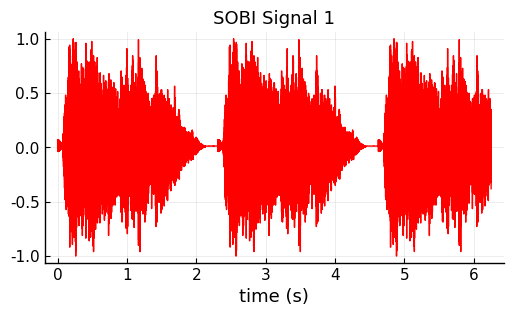

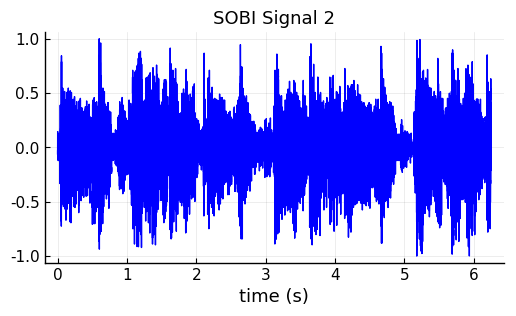

In [31]:
sort_idx = sortperm(abs.(C_SOBI[:, 1:2]' * C)[:, 1], rev = true)

p1 = plot(reuse = false, size = (500, 300))
p1 = plot!((1:1:length(s1)) / Int(fs), scale_11(C_SOBI[:, sort_idx[1]]), xlabel = "time (s)", title = "SOBI Signal 1", legend = false, tickfont = Plots.font("Helvetica", 11), guidefont = Plots.font("Helvetica", 13), titlefont = Plots.font("Helvetica", 13), color = :red)

p2 = plot(reuse = false, size = (500, 300))
p2 = plot!((1:1:length(s2)) / Int(fs), scale_11(C_SOBI[:, sort_idx[2]]), xlabel = "time (s)", title = "SOBI Signal 2", legend = false, tickfont = Plots.font("Helvetica", 11), guidefont = Plots.font("Helvetica", 13), titlefont = Plots.font("Helvetica", 13), color = :blue)

display(plot(p1))
display(plot(p2))

# Changepoint

In [41]:
# Make Data

n = 1000
n_frac = 0.5
seq_len = Int(n * n_frac)

k = 4
p = 4

S = hcat([gen_arma_sequence(seq_len, [0.2, 0.7], []); zeros(seq_len)],
        [zeros(seq_len); gen_arma_sequence(seq_len, [0.3, 0.5], [])],
        [gen_cos_sequence(seq_len, 2.0)[1]; zeros(seq_len)],
        [zeros(seq_len); gen_cos_sequence(seq_len, 0.5)[1]]
    )
S = mapslices(normalize, S; dims = 1)

Q = [1 0 0 2; 2 1 0 0; 0 2 1 0; 0 0 2 1]
Q = mapslices(normalize, Q; dims = 1)

X = Q * S'

4×1000 Array{Float64,2}:
 0.0108088   0.00213354   0.0199801  0.0141667  …  -0.0388124   -0.0143502 
 0.0216175   0.00426707   0.0399602  0.0283334      0.00692611   0.0190813 
 0.028271   -0.0117649   -0.0184791  0.0271449      0.0138522    0.0381626 
 0.0565419  -0.0235297   -0.0369583  0.0542899     -0.0194062   -0.00717511

In [42]:
# Perform DMD

_, Q_hat, C_hat, _ = dmf(X; C_nsv = k)
@show eigenvector_error(Q, Q_hat)
@show eigenvector_error(S, C_hat)

eigenvector_error(Q, Q_hat) = 0.004892185647852543
eigenvector_error(S, C_hat) = 0.004608786362076955


0.004608786362076955

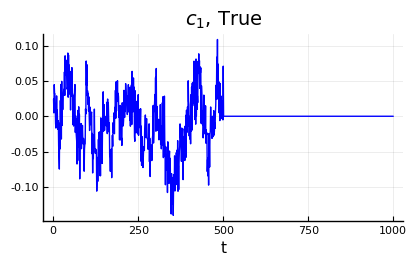

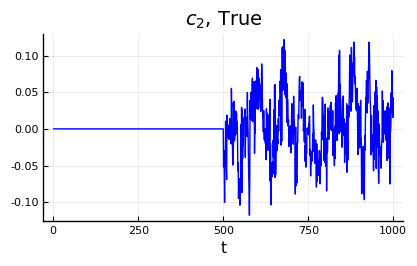

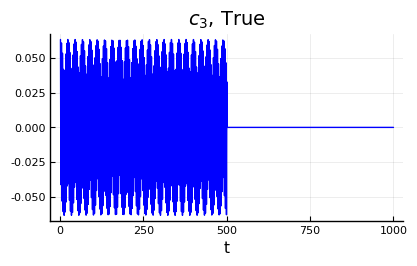

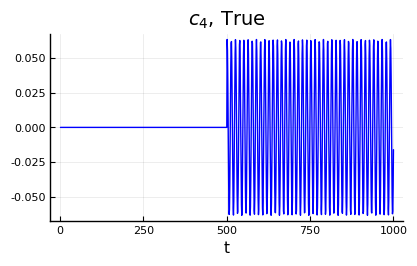

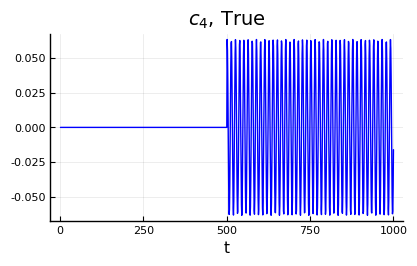

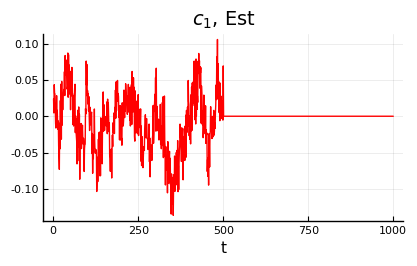

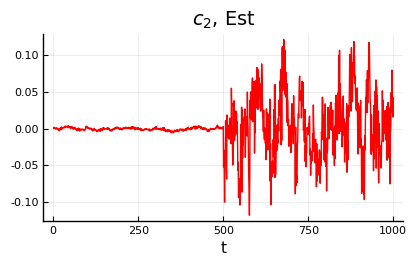

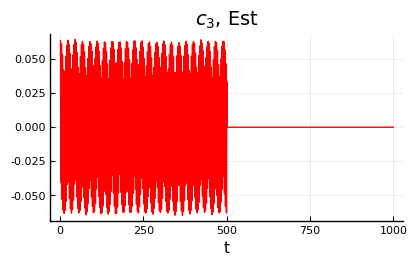

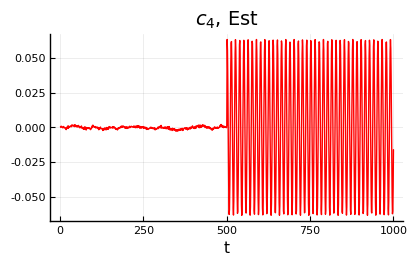

In [48]:
S_IP = abs.(S' * mapslices(normalize, C_hat; dims = 1))

plot_arr = []
c_str = [L"c_1", L"c_2", L"c_3", L"c_4"]
for p_idx = 1:1:k
    p1 = plot(reuse = false)
    p1 = plot!(real.(S[:, p_idx]), title = c_str[p_idx] * ", True", xlabel = "t", legend = false, color = :blue)
    
    push!(plot_arr, p1)
end
for p_idx = 1:1:k
    p1 = plot(reuse = false)
    
    plot_tmp = real.(C_hat[:, findmax(S_IP[p_idx, :])[2]])
    plot_tmp = sign(plot_tmp' * S[:, p_idx]) * plot_tmp
    
    p1 = plot!(plot_tmp, title = c_str[p_idx] * ", Est", xlabel = "t", legend = false, color = :red)
    push!(plot_arr, p1)
end
trace_size = (400, 250)
display(plot(plot_arr[1], size = trace_size))
display(plot(plot_arr[2], size = trace_size))
display(plot(plot_arr[3], size = trace_size))
display(plot(plot_arr[4], size = trace_size))
display(plot(plot_arr[4], size = trace_size))
display(plot(plot_arr[5], size = trace_size))
display(plot(plot_arr[6], size = trace_size))
display(plot(plot_arr[7], size = trace_size))
display(plot(plot_arr[8], size = trace_size))